# Relatório - Tipos de distribuições teóricas e testes de hipóteses

In [206]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Lendo base de dados disponibilizada pelo ENADE.

O Exame Nacional de Desempenho dos Estudantes (Enade) avalia o rendimento dos concluintes dos cursos de graduação em relação aos conteúdos programáticos previstos nas diretrizes curriculares dos cursos, o desenvolvimento de competências e habilidades necessárias ao aprofundamento da formação geral e profissional, e o nível de atualização dos estudantes com relação à realidade brasileira e mundial.

A inscrição é obrigatória para estudantes ingressantes e concluintes habilitados de cursos de bacharelado e superiores de tecnologia vinculados às áreas de avaliação da edição. A situação de regularidade do estudante é registrada no histórico escolar.

In [207]:
df = pd.read_csv('microdados_enade_2018econ.csv', sep=';')

In [208]:
df.head()

,Ano Fim Em,Ano In Grad,Co Categad,Co Grupo,Co Ies,Co Munic Curso,Co Rs I1,Co Rs I2,Co Rs I3,Co Rs I4,...,Tp Pr Di Fg,Tp Pr Ger,Tp Pr Ob Ce,Tp Pr Ob Fg,Tp Pres,Tp Sce D1,Tp Sce D2,Tp Sce D3,Tp Sfg D1,Tp Sfg D2
0,2012,2013,10002,13,789,1400100,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
1,1987,1988,10002,13,583,2304400,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
2,2004,2005,10002,13,583,2304400,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
3,2007,2008,115,13,746,2304202,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
4,1998,2000,115,13,746,2304202,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222


Verificando tamanho da base de dados

In [209]:
df.shape
linhas_1 = df.shape[0]
linhas_1

9582

Removendo dados duplicados

In [210]:
df.drop_duplicates(inplace=True)

In [211]:
df.shape
linhas_2 = df.shape[0]
linhas_2

9543

In [212]:
print(f'O número de valores considerados duplicados foi de {linhas_1 - linhas_2} alunos')

O número de valores considerados duplicados foi de 39 alunos


## Distribuições teóricas das notas gerais

Renomeando coluna e convertendo "," para "."

In [213]:
df.rename(columns={'Nt Ger': 'notas_gerais'}, inplace=True)

In [214]:
df.notas_gerais = df.notas_gerais.replace(',','.', regex=True)
df.notas_gerais = df.notas_gerais.astype(float)

### Teste de normalidade Notas Gerais Alunos Economia do Brasil

In [215]:
print(f'1 - A média das notas foi de {df.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas foi de {df.notas_gerais.std()}')

1 - A média das notas foi de 38.39742351046704
2 - O devio padrão das notas foi de 13.137758259020998


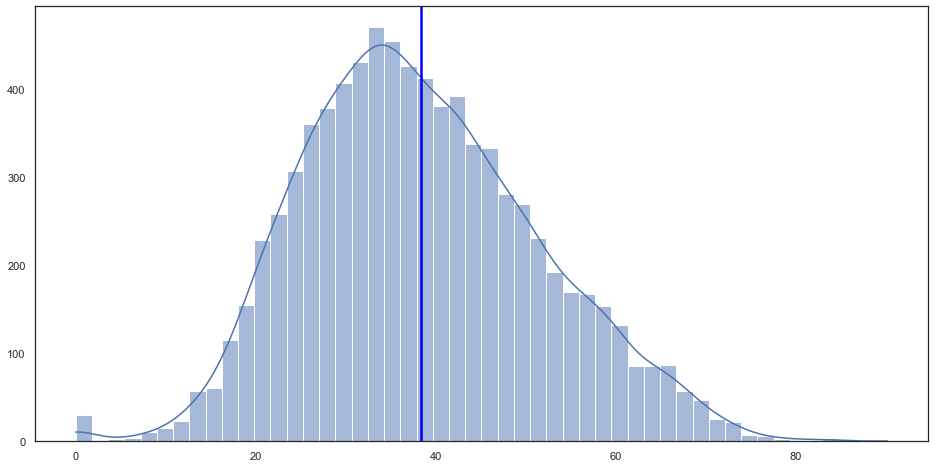

In [216]:
sns.set_theme(style='white')

ax = plt.subplots(figsize=(16, 8))
ax = sns.histplot(df.notas_gerais, kde=True)

# Parte visual

ax.set_title('', loc='Left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.axvline(x=df.notas_gerais.mean(),color='blue',ls='-',lw=2.5)

plt.show()

**Código**

Retirando valores nulos

In [217]:
notas = df.notas_gerais.dropna().to_frame()

Código QQ Teste

Um gráfico QQ é um gráfico de dispersão com dois conjuntos de quantis um contra o outro; se ambos os conjuntos de quantis vierem da mesma distribuição, os pontos formarão uma linha quase reta. No gráfico QQ, ao passo que mostra alguns valores discrepantes. O gráfico QQ tem uma aparência diferente de etapas. O gráfico QQ de outras variáveis ​​não é reta, portanto, mostrando o desvio da distribuição normal.

In [218]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

<AxesSubplot:xlabel='notas_gerais'>

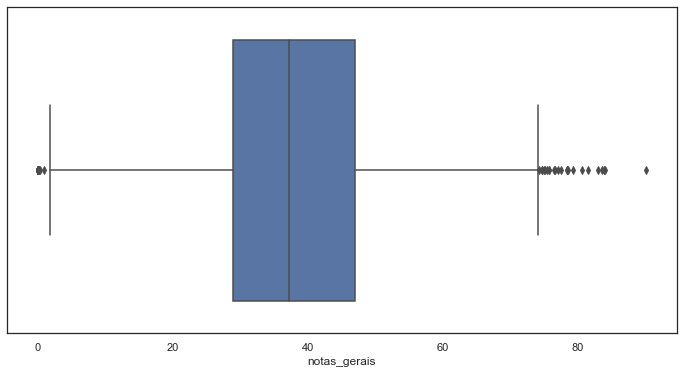

In [219]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=notas)

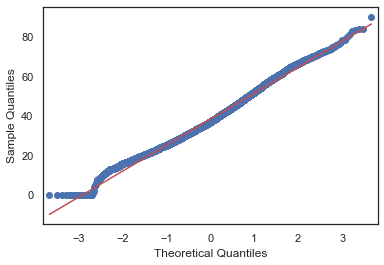

In [220]:
ax = sm.qqplot(notas.notas_gerais, line='s')
pylab.show()

Código Norm Teste

H0 = A amostra vem de uma distribuição normal.

HA = A amostra não vem da distribuição normal.

Ele é baseado no teste de D'Agostino e Pearson 

O teste de D'Agostino-Pearson foi desenvolvido para lidar com amostras mais numerosas (n > 100), apresentando, nesses casos, desempenho próximo ao do Shapiro-Wilk. O teste de Jarque-Bera apresenta bom desempenho na avaliação de normalidade em amostras maiores que 50 unidades, assim como o teste de Anderson-Darling2

In [221]:
from scipy.stats import normaltest

In [222]:
stat_test, p_valor = normaltest(notas.notas_gerais)
p_valor

2.4530404640098998e-27

In [223]:
alpha = 0.05 # Definindo significância

In [224]:
p_valor <= alpha

True

Código Shapiro Teste

Apesar deste teste ser fácil e objetivo, ele tem suas limitações. O Shapiro-Wilk não é capaz de detectar normalidade em amostras pequenas.  Já em amostras grandes, ele costuma apresentar significância para pequenos desvios da normalidade (Miot, 2017).

Por isso, o teste deve ser usado com cautela. Em breve, apresentaremos no blog outras formas de análise da normalidade. Vamos aprender cada uma destas análises

In [225]:
from scipy.stats import shapiro

In [226]:
stat_test, p_valor = shapiro(notas.notas_gerais)
p_valor

C:\Users\walas\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1.926550044279003e-22

In [227]:
p_valor <= alpha

True

O teste de Kolmogorov-Smirnov deve ser dedicado apenas à verificação de aderência da amostra a distribuições com outros parâmetros, visto que é superado pelos outros aqui descritos para testar a normalidade dos dados. Por outro lado, o emprego da correção de Lilliefors oferece uma boa opção para analisar normalidade quando a distribuição contiver muitos dados extremos e a amostra for maior que 30 unidades

In [228]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(notas.notas_gerais.dropna(), 'norm')
p_valor <= alpha

True

In [229]:
p_valor

1.926550044279003e-22

O emprego da correção de Lilliefors oferece uma boa opção para analisar normalidade quando a distribuição contiver muitos dados extremos e a amostra for maior que 30 unidades

In [230]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(notas.notas_gerais.dropna())
p_valor <= alpha

True

In [231]:
p_valor

1.926550044279003e-22

### Critério do valor $p$
#### Rejeitar $H_0$ se o valor $p\leq 0,05$

*A distribuição de frequência das notas gerais não pode ser classificada como uma distribuição normal em 3 testes. Sendo mais semelhante a uma distribuição assimétrica a esqueda.*

### Distribuição Geral para Qe I21 A e B

In [232]:
df['Qe I21'].value_counts()

A    6510
B    1985
Name: Qe I21, dtype: int64

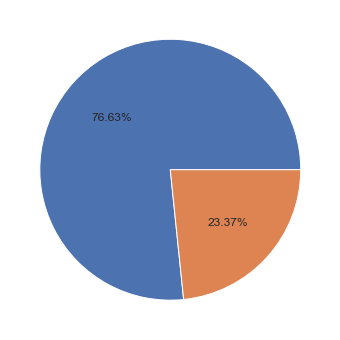

In [233]:
ax = plt.subplots(figsize=(12, 6))

ax = plt.pie(df['Qe I21'].value_counts(normalize=True), autopct = "%0.2f%%")

plt.show()

In [234]:
df_a = df[df['Qe I21'] == "A"]
len(df_a)

6510

In [235]:
df_b = df[df['Qe I21'] == "B"]
len(df_b)

1985

In [236]:
print(f'1 - A média das notas dos Alunos Qe I21 A foi de {df_a.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas dos Alunos Qe I21 A foi de {df_a.notas_gerais.std()}')

1 - A média das notas dos Alunos Qe I21 A foi de 39.35790333115619
2 - O devio padrão das notas dos Alunos Qe I21 A foi de 13.291073283157154


In [237]:
renda_a = df_a['Qe I08'].value_counts().to_frame()
renda_a['Renda'] = ['Até 1,5', 'De 1,5 a 3', 'De 3 a 4,5', 'De 4,5 a 6', 'De 6 a 10', 'De 10 a 30', 'Acima de 30']
renda_a.sort_values(by='Qe I08',ascending=False, inplace=True)
renda_a

,Qe I08,Renda
F,1235,"Até 1,5"
E,1127,"De 1,5 a 3"
C,1061,"De 3 a 4,5"
B,986,"De 4,5 a 6"
A,849,De 6 a 10
D,765,De 10 a 30
G,487,Acima de 30


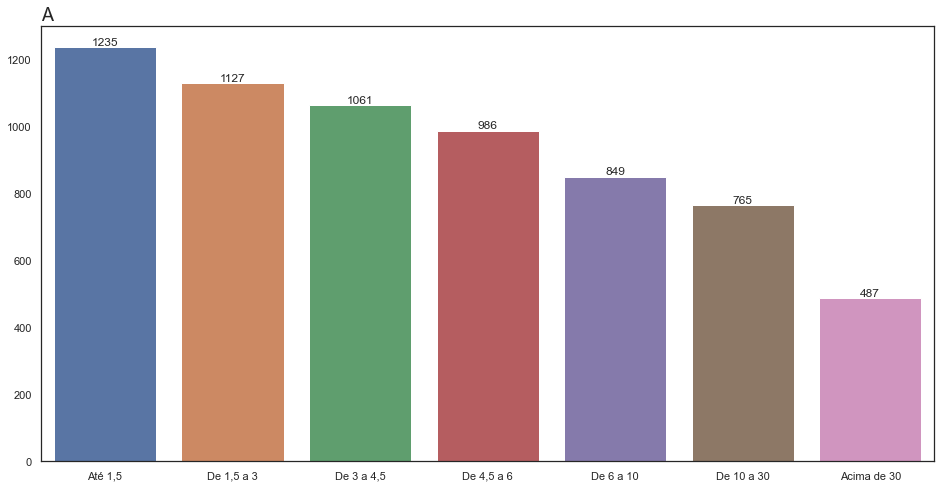

In [238]:
sns.set_theme(style='white')

ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(data=renda_a, x='Renda', y='Qe I08')

ax.set_title('A', loc='Left', fontsize=18)
ax.bar_label(ax.containers[0])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [239]:
print(f'1 - A média das notas dos Alunos Qe I21 B foi de {df_b.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas dos Alunos Qe I21 B foi de {df_b.notas_gerais.std()}')

1 - A média das notas dos Alunos Qe I21 B foi de 35.40173684210529
2 - O devio padrão das notas dos Alunos Qe I21 B foi de 12.11043410240612


In [240]:
renda_b = df_b['Qe I08'].value_counts().to_frame()
renda_b['Renda'] = ['Até 1,5', 'De 1,5 a 3', 'De 3 a 4,5', 'De 4,5 a 6', 'De 6 a 10', 'De 10 a 30', 'Acima de 30']
renda_b.sort_values(by='Qe I08',ascending=False, inplace=True)
renda_b

,Qe I08,Renda
B,576,"Até 1,5"
C,447,"De 1,5 a 3"
A,437,"De 3 a 4,5"
D,228,"De 4,5 a 6"
E,211,De 6 a 10
F,74,De 10 a 30
G,12,Acima de 30


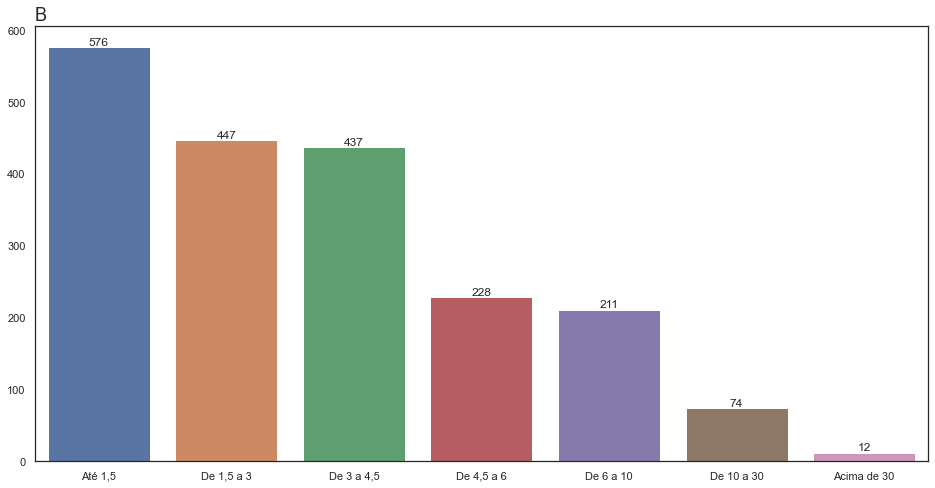

In [241]:
sns.set_theme(style='white')

ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(data=renda_b, x='Renda', y='Qe I08')

ax.set_title('B', loc='Left', fontsize=18)
ax.bar_label(ax.containers[0])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

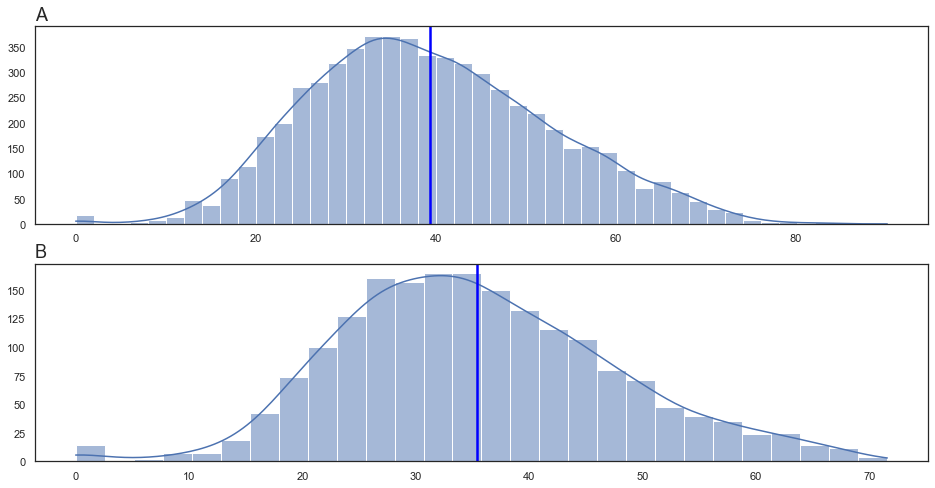

In [242]:
plt.subplots(figsize=(16, 8))

ax = plt.subplot(2, 1, 1)
sns.histplot(df_a.notas_gerais, kde=True)

ax.set_title('A', loc='Left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.axvline(x=df_a.notas_gerais.mean(),color='blue',ls='-',lw=2.5)


ax1 = plt.subplot(2, 1, 2)
sns.histplot(df_b.notas_gerais, kde=True)

ax1.set_title('B', loc='Left', fontsize=18)
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('', fontsize=14)
plt.axvline(x=df_b.notas_gerais.mean(),color='blue',ls='-',lw=2.5)

plt.show()

#### Teste Normalidade A

<AxesSubplot:xlabel='notas_gerais'>

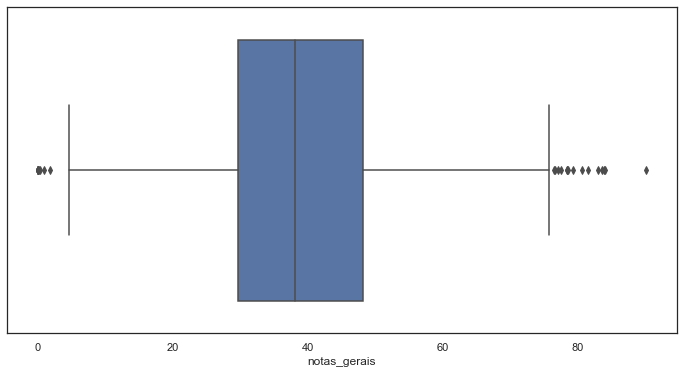

In [243]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=df_a)

A


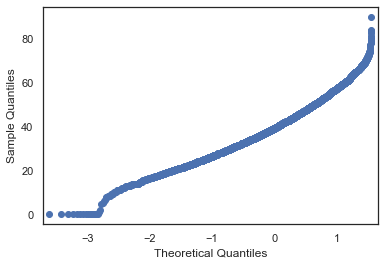

In [244]:
ax = sm.qqplot(df_a.notas_gerais, line='s')

print('A')

pylab.show()

In [245]:
stat_test, p_valor = normaltest(df_a.notas_gerais.dropna())
p_valor

8.60534186363783e-21

In [246]:
p_valor <= alpha

True

In [247]:
stat_test, p_valor = shapiro(df_a.notas_gerais.dropna())
p_valor

C:\Users\walas\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1.702557523881917e-18

In [248]:
p_valor <= alpha

True

In [249]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df_a.notas_gerais.dropna(), 'norm')
p_valor <= alpha

True

In [250]:
p_valor

1.702557523881917e-18

In [251]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(df_a.notas_gerais.dropna())
p_valor <= alpha

True

In [252]:
p_valor

1.702557523881917e-18

#### Teste Normalidade B

<AxesSubplot:xlabel='notas_gerais'>

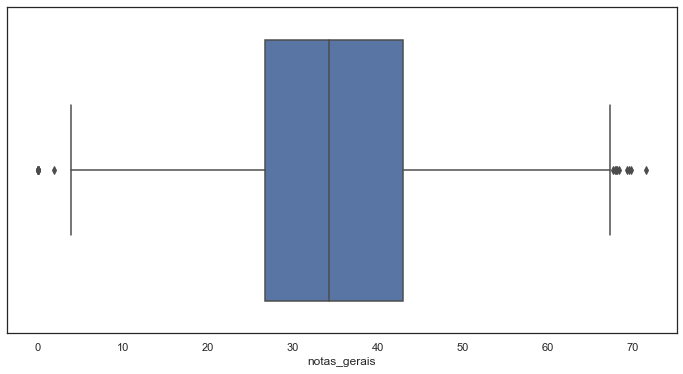

In [253]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=df_b)

B


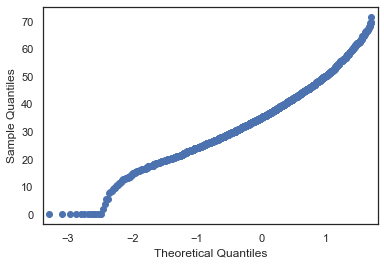

In [254]:
ax = sm.qqplot(df_b.notas_gerais, line='s'),

print('B')

pylab.show()

In [255]:
stat_test, p_valor = normaltest(df_b.notas_gerais.dropna())
p_valor

1.0003945271026058e-05

In [256]:
p_valor <= alpha

True

In [257]:
stat_test, p_valor = shapiro(df_b.notas_gerais.dropna())
p_valor

1.562585755232604e-10

In [258]:
p_valor <= alpha

True

In [259]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df_b.notas_gerais.dropna(), 'norm')
p_valor <= alpha

True

In [260]:
p_valor

1.562585755232604e-10

In [261]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(df_b.notas_gerais.dropna())
p_valor <= alpha

True

In [262]:
p_valor

1.562585755232604e-10

Em 5 testes P foi menor que o nível de significância H0 deve ser rejeitado

### Teste Não Paramétrico Geral 

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

H<sub>0</sub> (B = A)

H<sub>1</sub> (B != A)

In [263]:
df_a_teste = df_a[df['notas_gerais'] != 0].dropna()
len(df_a_teste)

C:\Users\walas\AppData\Local\Temp\ipykernel_14000\2229192524.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_a_teste = df_a[df['notas_gerais'] != 0].dropna()


1074

In [264]:
df_b_teste = df_b[df['notas_gerais'] != 0].dropna()
k = int(len(df_b_teste))

C:\Users\walas\AppData\Local\Temp\ipykernel_14000\2084526092.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_b_teste = df_b[df['notas_gerais'] != 0].dropna()


In [265]:
F_Observada = df_b_teste.notas_gerais.sample(k, replace=True).to_frame()
F_Esperada = df_a_teste.notas_gerais.sample(k, replace=True).to_frame()

F_Observada = list(F_Observada.notas_gerais)
F_Esperada = list(F_Esperada.notas_gerais)

significancia = 0.05
confianca = 1 - significancia
graus_de_liberdade = k - 1

In [266]:
from scipy.stats import chi

chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_2_alpha

334.9898387219035

In [267]:
chi_2 = 0
for i in range(k):
  chi_2 += (F_Observada[i] - F_Esperada[i]) ** 2 /  F_Esperada[i]
  
chi_2

9103.006587296142

In [268]:
chi_2 >= chi_2_alpha

True

### $H_0$ *As distribuições são iguais*
### $H_1$ *As distribuições não são iguais*

### Rejeitar $H_0$ se $\chi^2 > \chi_{\alpha}^2$

### Teste de Normalidade Alunos de Federais

In [269]:
federais = df[(df['Co Categad'] == 93) | (df['Co Categad'] == 10002)]
federais.head()

,Ano Fim Em,Ano In Grad,Co Categad,Co Grupo,Co Ies,Co Munic Curso,Co Rs I1,Co Rs I2,Co Rs I3,Co Rs I4,...,Tp Pr Di Fg,Tp Pr Ger,Tp Pr Ob Ce,Tp Pr Ob Fg,Tp Pres,Tp Sce D1,Tp Sce D2,Tp Sce D3,Tp Sfg D1,Tp Sfg D2
0,2012,2013,10002,13,789,1400100,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
1,1987,1988,10002,13,583,2304400,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
2,2004,2005,10002,13,583,2304400,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
5,2006,2010,10002,13,580,2611606,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
6,2010,2011,10002,13,580,2611606,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222


In [270]:
federais.shape

(4190, 137)

Temos 4190 Alunos de universidades federais

In [271]:
print(f'1 - A média das notas foi de {federais.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas foi de {federais.notas_gerais.std()}')

1 - A média das notas foi de 39.7765863119978
2 - O devio padrão das notas foi de 13.179830424882157


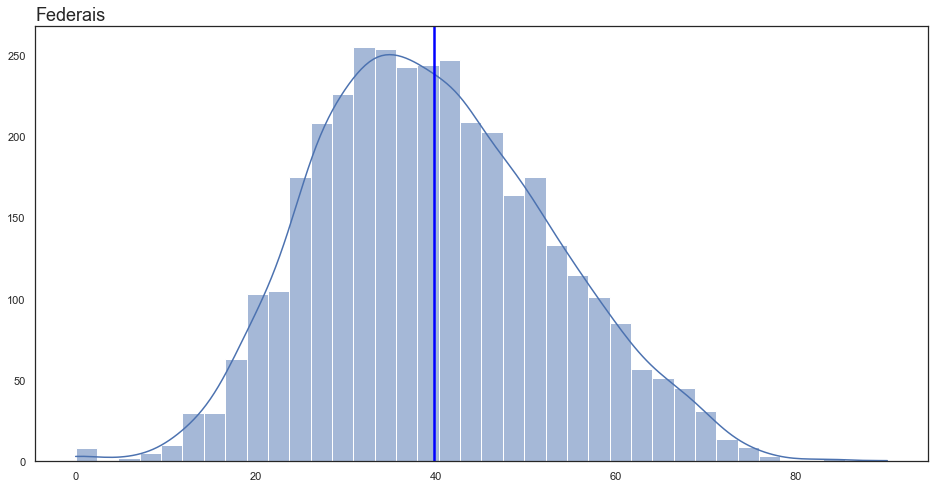

In [272]:
sns.set_theme(style='white')

ax = plt.subplots(figsize=(16, 8))
ax = sns.histplot(federais.notas_gerais, kde=True)

# Parte visual

ax.set_title('Federais', loc='Left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.axvline(x=federais.notas_gerais.mean(),color='blue',ls='-',lw=2.5)

plt.show()

<AxesSubplot:xlabel='notas_gerais'>

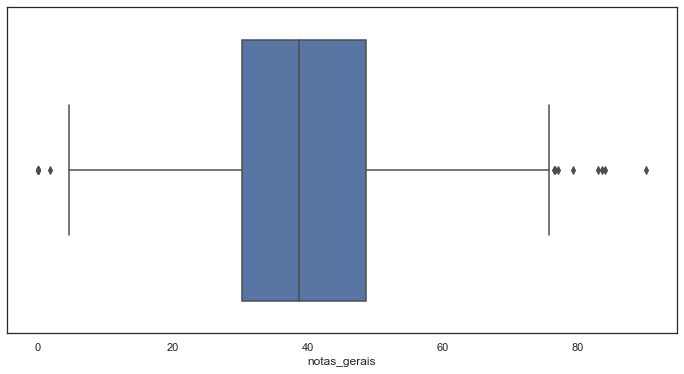

In [273]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=federais)

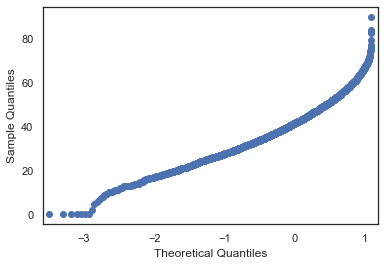

In [274]:
ax = sm.qqplot(federais.notas_gerais, line='s')
pylab.show()

In [275]:
stat_test, p_valor = normaltest(federais.notas_gerais.dropna())
p_valor

8.674420016053663e-11

In [276]:
p_valor <= alpha

True

In [277]:
stat_test, p_valor = shapiro(federais.notas_gerais.dropna())
p_valor

3.95819228088401e-12

In [278]:
p_valor <= alpha

True

In [279]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(federais.notas_gerais.dropna(), 'norm')
p_valor <= alpha

True

In [280]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(federais.notas_gerais.dropna())
p_valor <= alpha

True

#### Teste federais A e B

In [281]:
federais['Qe I21'].value_counts()

A    2961
B     871
Name: Qe I21, dtype: int64

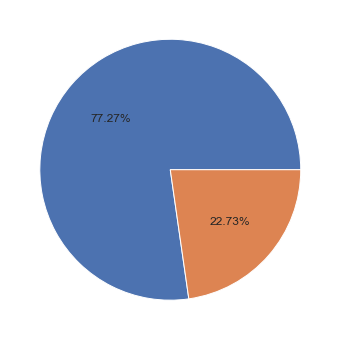

In [282]:
ax = plt.subplots(figsize=(12, 6))

ax = plt.pie(federais['Qe I21'].value_counts(normalize=True), autopct = "%0.2f%%")

plt.show()

In [283]:
df_a_federais = federais[federais['Qe I21'] == "A"]
df_b_federais = federais[federais['Qe I21'] == "B"]

In [284]:
print(f'1 - A média das notas dos Alunos de Federais Qe I21 A foi de {df_a_federais.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas dos Alunos de Federais Qe I21 A foi de {df_a_federais.notas_gerais.std()}')

1 - A média das notas dos Alunos de Federais Qe I21 A foi de 40.59577159378388
2 - O devio padrão das notas dos Alunos de Federais Qe I21 A foi de 13.313550044848716


In [285]:
print(f'1 - A média das notas dos Alunos de Federais Qe I21 B foi de {df_b_federais.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas dos Alunos de Federais Qe I21 B foi de {df_b_federais.notas_gerais.std()}')

1 - A média das notas dos Alunos de Federais Qe I21 B foi de 37.13845223700122
2 - O devio padrão das notas dos Alunos de Federais Qe I21 B foi de 12.380032408848717


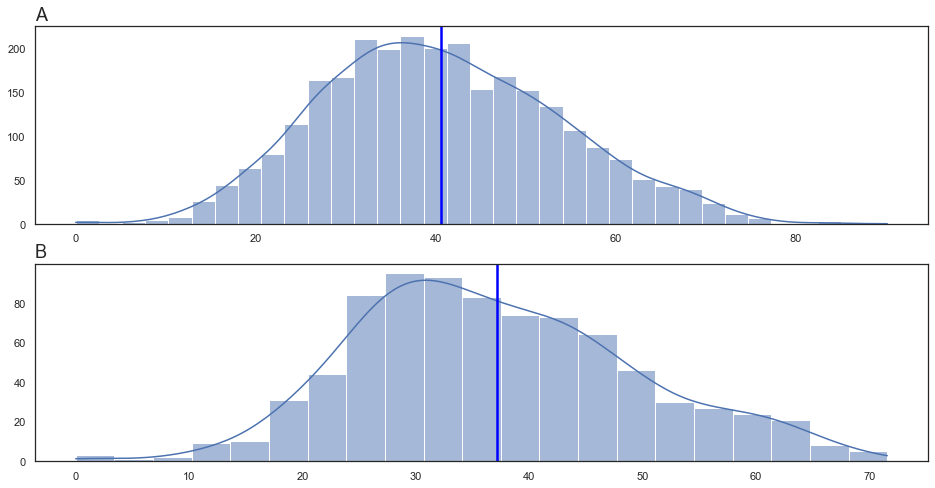

In [286]:
plt.subplots(figsize=(16, 8))

ax = plt.subplot(2, 1, 1)
sns.histplot(df_a_federais.notas_gerais, kde=True)

ax.set_title('A', loc='Left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.axvline(x=df_a_federais.notas_gerais.mean(),color='blue',ls='-',lw=2.5)


ax1 = plt.subplot(2, 1, 2)
sns.histplot(df_b_federais.notas_gerais, kde=True)

ax1.set_title('B', loc='Left', fontsize=18)
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('', fontsize=14)
plt.axvline(x=df_b_federais.notas_gerais.mean(),color='blue',ls='-',lw=2.5)

plt.show()

### Teste Não Paramétrico Geral 

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

H<sub>0</sub> (B = A)

H<sub>1</sub> (B != A)

In [287]:
df_a_teste = df_a_federais[df_a_federais['notas_gerais'] != 0].dropna()
len(df_a_teste)

521

In [288]:
df_b_teste = df_b_federais[df_b_federais['notas_gerais'] != 0].dropna()
k = len(df_b_teste)

In [289]:
F_Observada = df_b_teste.notas_gerais.sample(k, replace=True).to_frame()
F_Esperada = df_a_teste.notas_gerais.sample(k, replace=True).to_frame()

F_Observada = list(F_Observada.notas_gerais)
F_Esperada = list(F_Esperada.notas_gerais)

significancia = 0.05
confianca = 1 - significancia
graus_de_liberdade = k - 1

In [290]:
chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_2_alpha

142.13816003902647

In [291]:
chi_2 = 0
for i in range(k):
  chi_2 += (F_Observada[i] - F_Esperada[i]) ** 2 /  F_Esperada[i]
  
chi_2

956.203506085631

In [292]:
chi_2 >= chi_2_alpha

True

### $H_0$ *As distribuições são iguais*
### $H_1$ *As distribuições não são iguais*

### Rejeitar $H_0$ se $\chi^2 > \chi_{\alpha}^2$

#### Teste federais A

<AxesSubplot:xlabel='notas_gerais'>

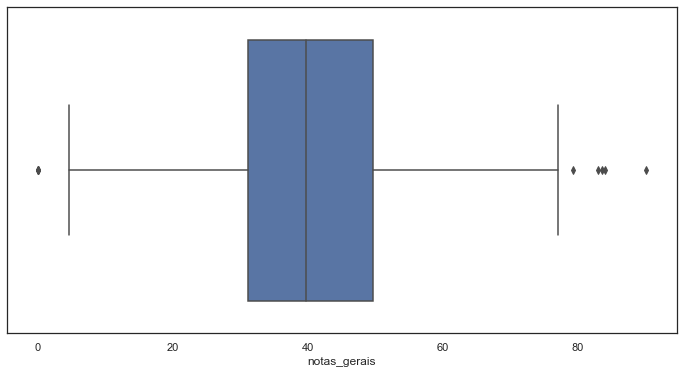

In [293]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=df_a_federais)

A


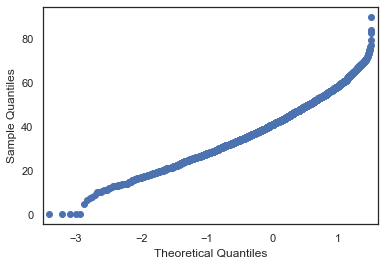

In [294]:
ax = sm.qqplot(df_a_federais.notas_gerais, line='s')

print('A')

pylab.show()

In [295]:
stat_test, p_valor = normaltest(df_a_federais.notas_gerais.dropna())
p_valor <= alpha

True

In [296]:
stat_test, p_valor = shapiro(df_a_federais.notas_gerais.dropna())
p_valor <= alpha

True

In [297]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(df_a_federais.notas_gerais.dropna())
p_valor <= alpha

True

In [298]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df_a_federais.notas_gerais.dropna(), 'norm')
p_valor <= alpha

True

#### Teste federais B

<AxesSubplot:xlabel='notas_gerais'>

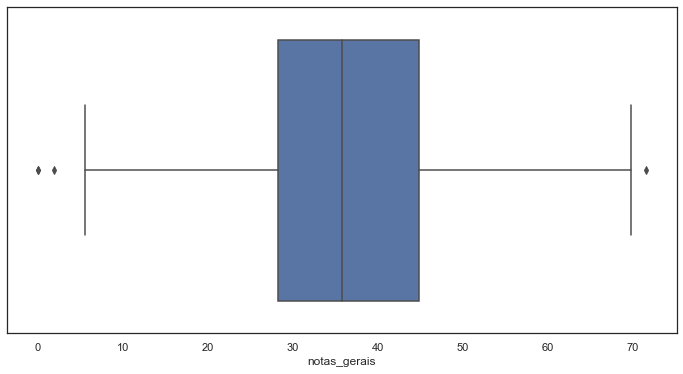

In [299]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=df_b_federais)

B


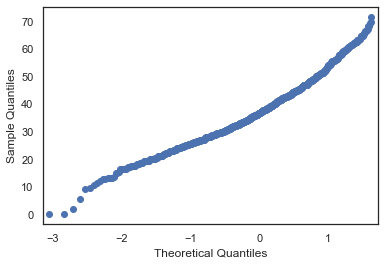

In [300]:
ax = sm.qqplot(df_b_federais.notas_gerais, line='s')

print('B')

pylab.show()

In [301]:
stat_test, p_valor = normaltest(df_b_federais.notas_gerais.dropna())
p_valor <= alpha

True

In [302]:
stat_test, p_valor = shapiro(df_a_federais.notas_gerais.dropna())
p_valor <= alpha

True

In [303]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(df_b_federais.notas_gerais.dropna())
p_valor <= alpha

True

In [304]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df_b_federais.notas_gerais.dropna(), 'norm')
p_valor <= alpha

True

Em 5 testes P foi menor que o nível de significância H0 deve ser rejeitado

### Testes de Normalidade Alunos da UFPR

In [305]:
ufpr1 = df[(df['Co Uf Curso'] == 41) & (df['Co Categad'] == 93)]
ufpr2 = df[(df['Co Uf Curso'] == 41) & (df['Co Categad'] == 10002)]

ufpr = pd.concat([ufpr1,ufpr2], ignore_index=True)

ufpr.shape

(169, 137)

In [306]:
print(f'1 - A média das notas foi de {ufpr.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas foi de {ufpr.notas_gerais.std()}')

1 - A média das notas foi de 35.3763888888889
2 - O devio padrão das notas foi de 13.298288370387134


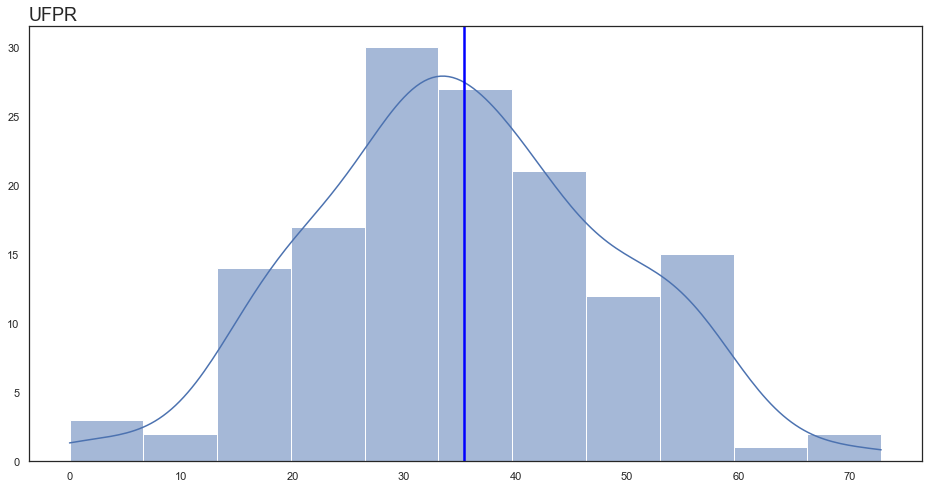

In [307]:
sns.set_theme(style='white')

ax = plt.subplots(figsize=(16, 8))
ax = sns.histplot(ufpr.notas_gerais, kde=True)

# Parte visual

ax.set_title('UFPR', loc='Left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.axvline(x=ufpr.notas_gerais.mean(),color='blue',ls='-',lw=2.5)

plt.show()

<AxesSubplot:xlabel='notas_gerais'>

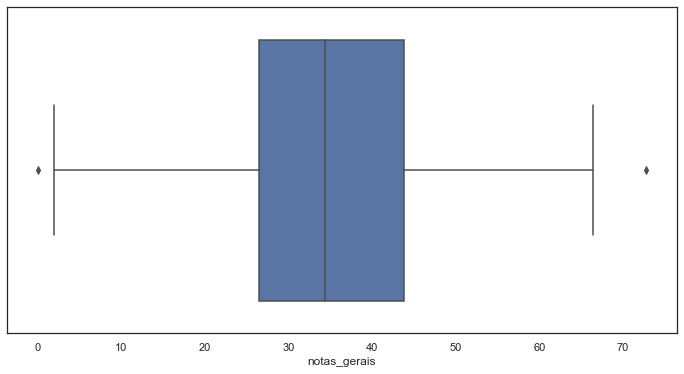

In [308]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=ufpr)

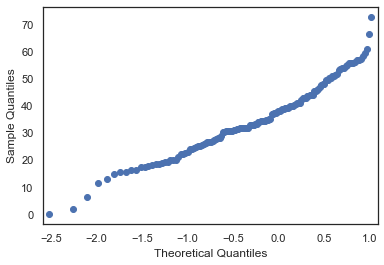

In [309]:
ax = sm.qqplot(ufpr.notas_gerais, line='s')
pylab.show()

In [310]:
stat_test, p_valor = normaltest(ufpr.notas_gerais.dropna())
p_valor <= alpha

False

In [311]:
stat_test, p_valor = shapiro(ufpr.notas_gerais.dropna())
p_valor <= alpha

False

In [312]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(ufpr.notas_gerais.dropna(), 'norm')
p_valor <= alpha

False

In [313]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(ufpr.notas_gerais.dropna())
p_valor <= alpha

False

#### Teste UFPR A B

In [314]:
ufpr['Qe I21'].value_counts()

A    113
B     46
Name: Qe I21, dtype: int64

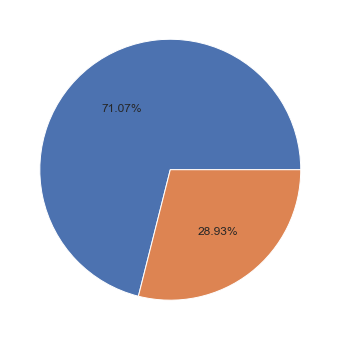

In [315]:
ax = plt.subplots(figsize=(12, 6))

ax = plt.pie(ufpr['Qe I21'].value_counts(normalize=True), autopct = "%0.2f%%")

plt.show()

In [316]:
df_a_ufpr = ufpr[ufpr['Qe I21'] == "A"]
df_b_ufpr = ufpr[ufpr['Qe I21'] == "B"]

In [317]:
print(f'1 - A média das notas dos Alunos de UFPR Qe I21 A foi de {df_a_ufpr.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas dos Alunos de UFPR Qe I21 A foi de {df_a_ufpr.notas_gerais.std()}')

1 - A média das notas dos Alunos de UFPR Qe I21 A foi de 37.12099999999999
2 - O devio padrão das notas dos Alunos de UFPR Qe I21 A foi de 13.70787059180295


In [318]:
print(f'1 - A média das notas dos Alunos de UFPR Qe I21 B foi de {df_b_ufpr.notas_gerais.mean()}')
print(f'2 - O devio padrão das notas dos Alunos de UFPR Qe I21 B foi de {df_b_ufpr.notas_gerais.std()}')

1 - A média das notas dos Alunos de UFPR Qe I21 B foi de 31.43953488372092
2 - O devio padrão das notas dos Alunos de UFPR Qe I21 B foi de 11.637872075477661


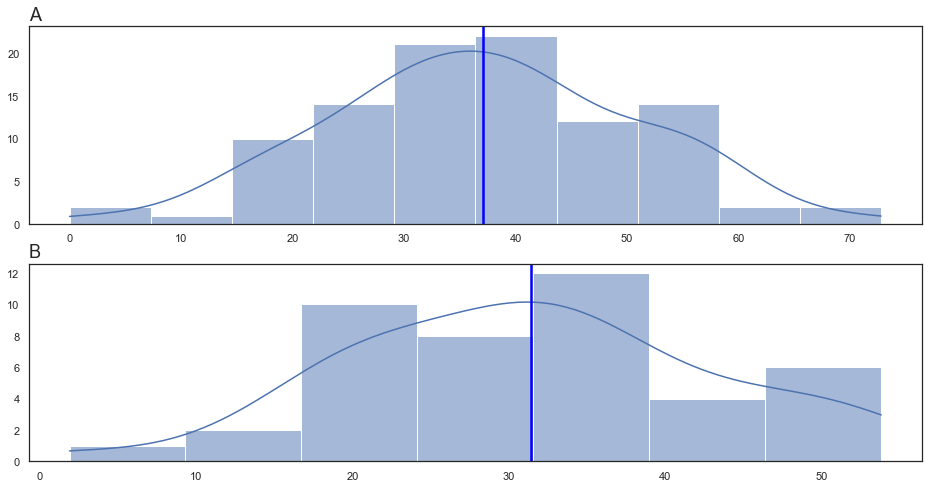

In [319]:
plt.subplots(figsize=(16, 8))

ax = plt.subplot(2, 1, 1)
sns.histplot(df_a_ufpr.notas_gerais, kde=True)

ax.set_title('A', loc='Left', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.axvline(x=df_a_ufpr.notas_gerais.mean(),color='blue',ls='-',lw=2.5)


ax1 = plt.subplot(2, 1, 2)
sns.histplot(df_b_ufpr.notas_gerais, kde=True)

ax1.set_title('B', loc='Left', fontsize=18)
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('', fontsize=14)
plt.axvline(x=df_b_ufpr.notas_gerais.mean(),color='blue',ls='-',lw=2.5)

plt.show()

### Teste Paramétrico Z

In [320]:
df_a_teste = df_a_ufpr[df_a_ufpr['notas_gerais'] != 0].dropna()
df_b_teste = df_b_ufpr[df_b_ufpr['notas_gerais'] != 0].dropna()

F_Observada = df_b_teste.notas_gerais.sample(k, replace=True).to_frame()
F_Esperada = df_a_teste.notas_gerais.sample(k, replace=True).to_frame()

In [321]:
significancia = 0.05
confianca = 1 - significancia
D_0 = 0

In [322]:
probabilidade = confianca
probabilidade

0.95

In [323]:
z_alpha = norm.ppf(probabilidade)
z_alpha

1.6448536269514722

In [324]:
numerador = (int(F_Esperada.notas_gerais.mean()) - int(F_Observada.notas_gerais.mean())) - D_0

denominador = np.sqrt(int(F_Esperada.notas_gerais.std()) ** 2 / len(F_Esperada)) + (int(F_Observada.notas_gerais.std()) ** 2 / len(F_Observada))

z = numerador / denominador

z

0.9750682869154434

In [337]:
z <= -z_alpha / 2

False

In [338]:
z >= z_alpha / 2

True

#### Teste UFPR A

<AxesSubplot:xlabel='notas_gerais'>

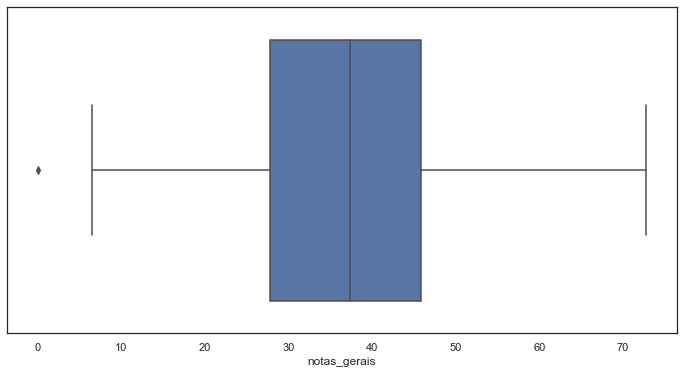

In [325]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=df_a_ufpr)

A


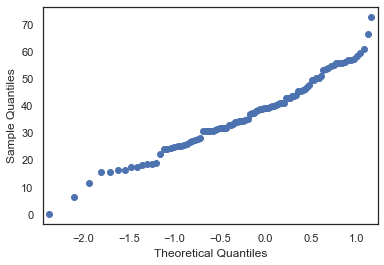

In [326]:
ax = sm.qqplot(df_a_ufpr.notas_gerais, line='s')

print('A')

pylab.show()

In [327]:
stat_test, p_valor = normaltest(df_a_ufpr.notas_gerais.dropna())
p_valor <= alpha

False

In [328]:
stat_test, p_valor = shapiro(df_a_ufpr.notas_gerais.dropna())
p_valor <= alpha

False

In [329]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df_a_ufpr.notas_gerais.dropna(), 'norm')
p_valor <= alpha

False

In [330]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(df_a_ufpr.notas_gerais.dropna())
p_valor <= alpha

False

#### Teste UFPR B

<AxesSubplot:xlabel='notas_gerais'>

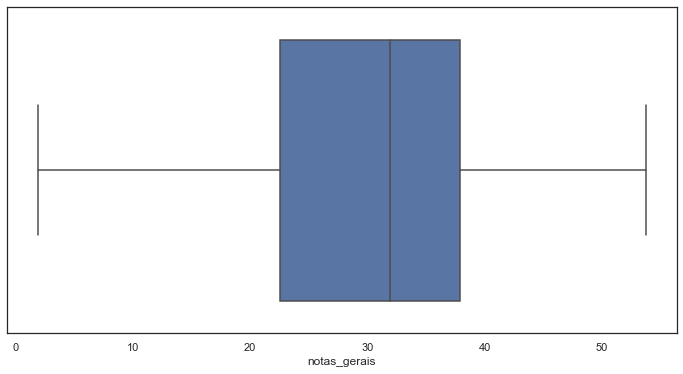

In [331]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x="notas_gerais", data=df_b_ufpr)

B


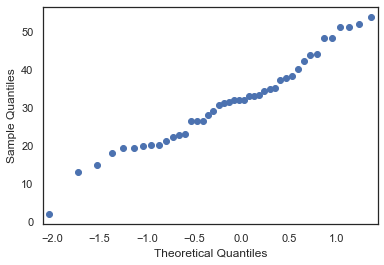

In [332]:
ax = sm.qqplot(df_b_ufpr.notas_gerais, line='s')

print('B')

pylab.show()

In [333]:
stat_test, p_valor = normaltest(df_b_ufpr.notas_gerais.dropna())
p_valor <= alpha

False

In [334]:
stat_test, p_valor = shapiro(df_b_ufpr.notas_gerais.dropna())
p_valor <= alpha

False

In [335]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(df_b_ufpr.notas_gerais.dropna(), 'norm')
p_valor <= alpha

False

In [336]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, p_value = lilliefors(df_b_ufpr.notas_gerais.dropna())
p_valor <= alpha

False

Em 5 testes P não foi menor que o nível de significância H0 não deve ser rejeitado